In [1]:
import pandas as pd
data = pd.read_csv('recruitment_data.csv')

In [2]:
data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [6]:
data.shape

(1500, 11)

In [8]:
data.isna().sum()

,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0
RecruitmentStrategy,0


<Axes: >

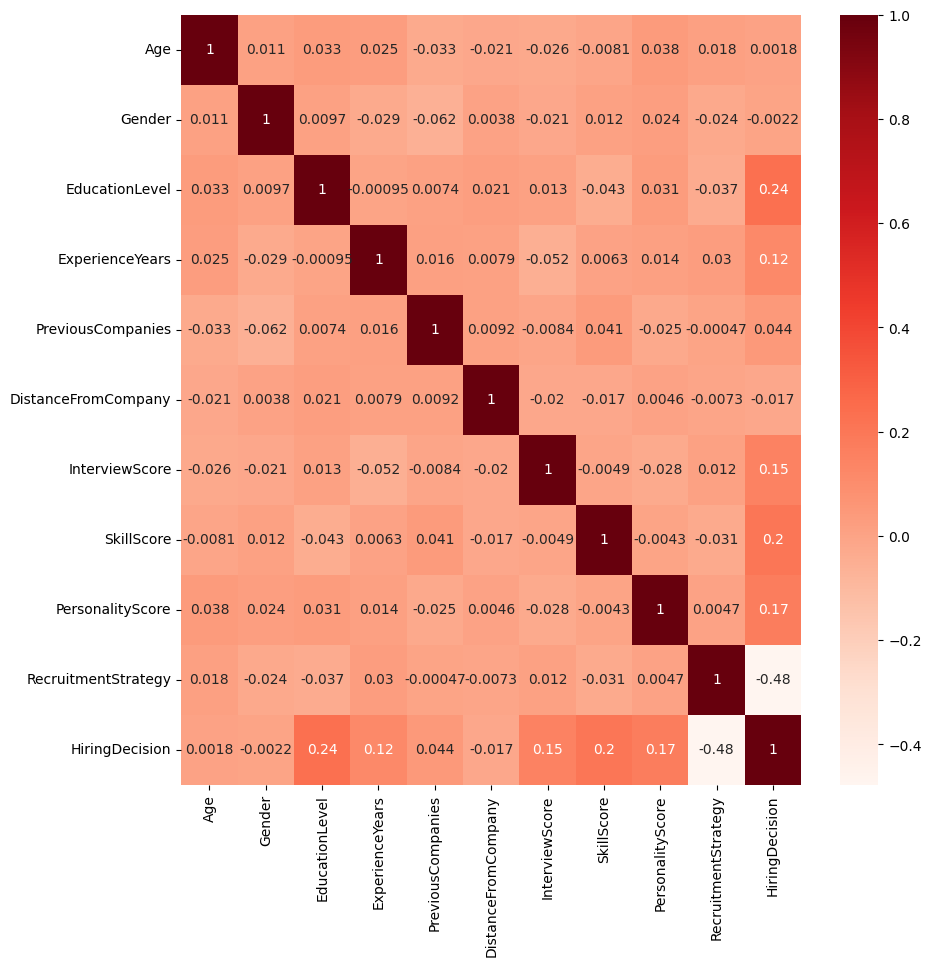

In [50]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sb.heatmap(data.corr(), annot=True, cmap='Reds')

<Axes: xlabel='EducationLevel', ylabel='count'>

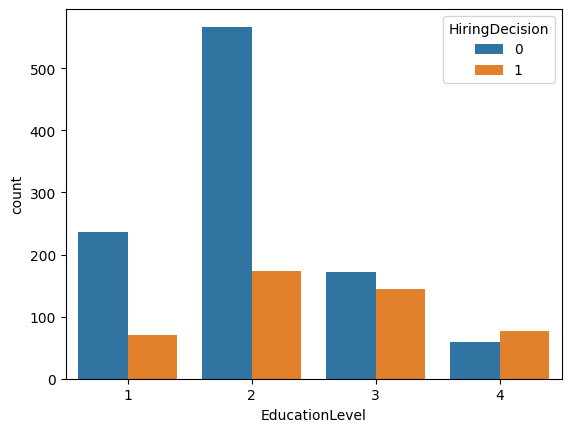

In [32]:
sb.countplot(x='EducationLevel', data=data, hue='HiringDecision')

<Axes: xlabel='Age', ylabel='count'>

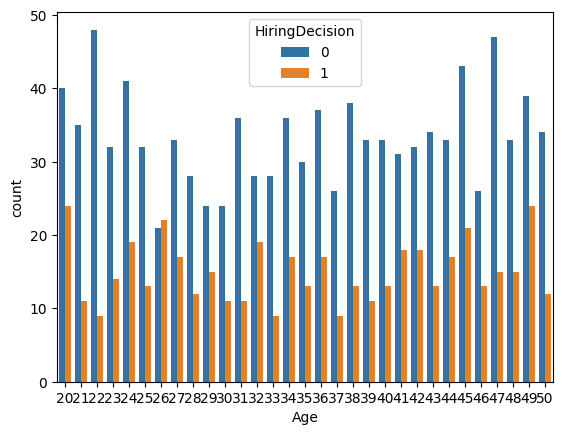

In [36]:
sb.countplot(x='Age', data=data, hue='HiringDecision')

<Axes: xlabel='Age', ylabel='count'>

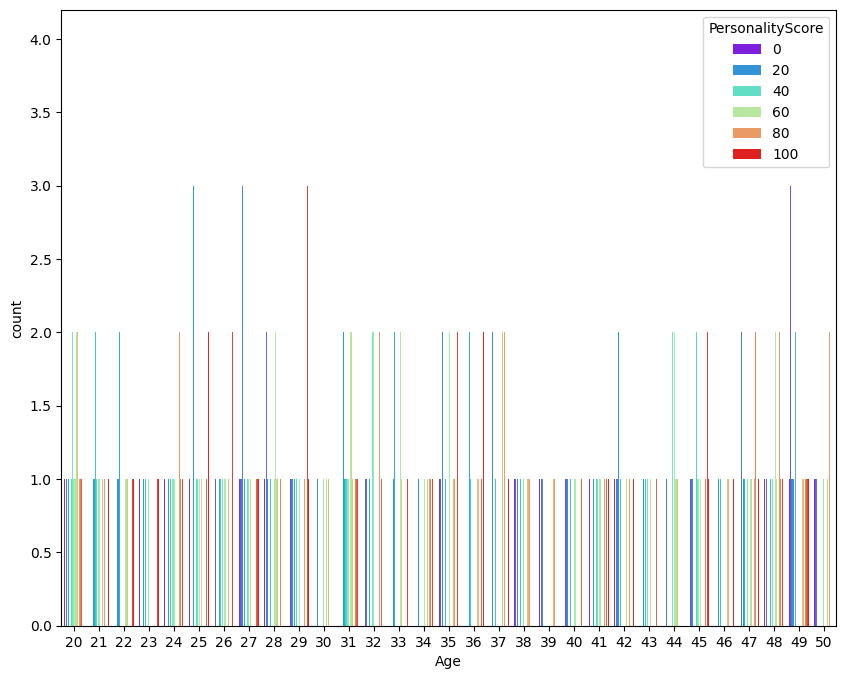

In [72]:
plt.figure(figsize=(10,8))
sb.countplot(x='Age', data=data, hue='PersonalityScore', palette='rainbow')

In [44]:
X = data.drop(['HiringDecision'], axis=1)
y = data['HiringDecision']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
predicciones = modelo.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicciones)

0.8533333333333334

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       198
           1       0.84      0.71      0.77       102

    accuracy                           0.85       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.85      0.85      0.85       300



In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[184,  14],
       [ 30,  72]])

In [54]:
pd.DataFrame(confusion_matrix(y_test, predicciones), columns=['Pred: No' , 'Pred: Si'],
             index=['Pred: No', 'Pred: Si'])

,Pred: No,Pred: Si
Pred: No,184,14
Pred: Si,30,72


In [55]:
X.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2


In [65]:
edad = int(input('Años de experiencia: '))
genero = int(input('Género (0: Mujer, 1: Hombre): '))
nivel_educativo = int(input('Nivel educativo (0: Básico, 1: Medio, 2: Avanzado, 3: maestria, 4:Phd): '))
experiencia_laboral = int(input('Años de experiencia laboral: '))
empresa_previa = int(input('Empresa previa (0: No, 1: Si): '))
distacia_companyia = int(input('Distancia de la compañía (0-100): '))
puntaje_entrevista = int(input('Puntaje de entrevista (0-100): '))
nivel_habilidades = int(input('Nivel de habilidades (0-100): '))
puntaje_personalidad = int(input('Puntaje de personalidad (0-100): '))
estrategia_reclutamiento = int(input('Estrategia de reclutamiento (1,2,3): '))
print("\n")

nueva_persona = [edad, genero, nivel_educativo, experiencia_laboral, empresa_previa, distacia_companyia, puntaje_entrevista, nivel_habilidades, puntaje_personalidad, estrategia_reclutamiento]

prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
    print('No se recomienda contratar a esta persona')
else:
    print('Se recomienda contratar a esta persona')


Años de experiencia: 2
Género (0: Mujer, 1: Hombre): 1
Nivel educativo (0: Básico, 1: Medio, 2: Avanzado): 2
Años de experiencia laboral: 2
Empresa previa (0: No, 1: Si): 1
Distancia de la compañía (0-100): 8
Puntaje de entrevista (0-100): 100
Nivel de habilidades (0-100): 95
Puntaje de personalidad (0-100): 83
Estrategia de reclutamiento (1,2,3): 
2
Se recomienda contratar a esta persona


In [75]:
print(predicciones)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])